In [ ]:
#=======
# Part 1
#=======

In [2]:
#=========================
# Import relevant packages
#=========================

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

#===================================================================
# define a function to find an Eulerian circuit in a connected graph
#===================================================================

def eulerian_circuit(G):
    
    for v in G:    # if degree of every vertex is not divisible exactly by 2 then return none
        if G.degree(v) % 2 != 0:                                      
            return None
        
    u = 0 # arbitrary starting value
        
        
    stack = [u]  # initialise stack with chosen arbitrary start point u 
    circuit = []    # initialise empty circuit
    
    visited_edges = set()   # set where edges will be stored when they have been traversed once
    
    while stack:  # while stack not empty
        current_vertex = stack[-1]    # call the last element in the stack current_vertex
        current_edges = list(G.edges(current_vertex))  # list edges connecting to the current vertex
        
        for edge in current_edges:  # loop through these edges
            if edge not in visited_edges and edge[::-1] not in visited_edges:  # if the edge not been traversed. need to use
                                                            # reverse of edge to include edge being travered from both ends
                visited_edges.add(edge)    # add edge to visited edges
                stack.append(edge[1])    # add neighbouring vertex to the stack 
                break   # break the for loop when a sufficient edge is found
        else:
             circuit.append(stack.pop()) # add last vertex in the stack to the circuit while removing it from the stack
    
    
    return circuit # return Eulerian circuit

                
        

In [8]:
#=======
# Part 2
#=======

In [ ]:
#==================================================================================
# define a function for breadth-first traversal of the graph starting from vertex u
#==================================================================================

def breadth_first_traversal(G, u):
    queue = deque()  # create a deque object for storing the vertices to be visited
    queue.append(u)  # add the start vertex to the queue

    seen = set()  # create an empty set to store the visited vertices
    
    while queue:  # repeat while the queue is not empty
        current_vertex = queue.popleft()  # get the first vertex in the queue

        if current_vertex not in seen:  # if the vertex has not been visited yet
            seen.add(current_vertex)  # add it to the set of visited vertices
            queue.extend(G[current_vertex])  # add all its neighbors to the queue
            
    return len(seen)  # return the number of vertices visited


#==============================================================================
# define a function to check if all vertices with positive degree are connected
#==============================================================================

def all_positive_degree_vertices_connected(G):
    positive_degree_v = []  # create an empty list to store vertices with positive degree

    for v in G:  # loop over all vertices in the graph
        if G.degree(v) > 0:  # if the degree of the vertex is positive
            positive_degree_v.append(v)  # add it to the list of vertices with positive degree
            
    u = positive_degree_v[0]  # choose an arbitrary vertex with positive degree as the starting point for BFT
    num = breadth_first_traversal(G, u)  # count the number of vertices visited by BFT from the starting point
    
    if num == len(positive_degree_v):  # if all vertices with positive degree were visited
        return True  # return True
    else:
        return False  # otherwise return False


In [4]:
#=========================================
# define updated eulerian circuit function
#=========================================


def eulerian_circuit_updated(G):
    
    if all_positive_degree_vertices_connected(G) == False:  #if all positive degree vertices of the graph are not connected
        return None 
    
    #---------------
    # rest as before
    #---------------
    
    for v in G:    
        if G.degree(v) % 2 != 0:                                      
            return None
        
    u = 0 
        
        
    stack = [u]  
    circuit = []    
    
    visited_edges = set()   
    
    while stack:  
        current_vertex = stack[-1]    
        current_edges = list(G.edges(current_vertex))  
        
        for edge in current_edges:  
            if edge not in visited_edges and edge[::-1] not in visited_edges:  
                                                           
                visited_edges.add(edge)    
                stack.append(edge[1])     
                break   
        else:
             circuit.append(stack.pop())
    
    
    return circuit


In [5]:
#===================================================================
# define recursive function to find a hamiltonian cylce in a graph G
#===================================================================

def hamiltonian_cycle(G):
    
    u = 0 # start at vertex 0 
    cycle = [u] # initialise cycle with vertex 0
    seen = set() # create a set to keep track of visited vertices
    n = len(G) # get the number of vertices in the graph

    def dive():
        
        if len(cycle) == n: # if the cycle contains all vertices
            if G.has_edge(cycle[0], cycle[-1]): # and if there is an edge between the first and last vertex
                cycle.append(u) # append the starting vertex to complete the cycle
                return cycle # return the cycle

        current_vertex = cycle[-1] # get the last vertex in the cycle
        seen.add(current_vertex) # add the current vertex to the set of visited vertices
        
        for neighbour in G[current_vertex]: # for each neighbour of the current vertex
            if neighbour not in seen: # if the neighbour has not been visited
                cycle.append(neighbour) # add the neighbour to the cycle
                res = dive() # recursively call the dive function
               
                if res is not None: # if a cycle has been found
                    return res # return the cycle
                cycle.pop() # otherwise, remove the neighbour from the cycle
       
        seen.remove(current_vertex) # remove the current vertex from the set of visited vertices
        return None # return None if no cycle has been found
   
    return dive() # start the recursion

                
                

            
                
    

Hamiltonian cycle for the Hoffman-Singleton graph is [0, 1, 17, 4, 3, 5, 12, 11, 2, 10, 18, 6, 22, 13, 30, 19, 7, 34, 15, 35, 25, 9, 32, 23, 14, 31, 20, 37, 29, 16, 33, 27, 44, 43, 42, 26, 38, 24, 41, 40, 21, 36, 39, 28, 48, 47, 45, 46, 49, 8, 0]


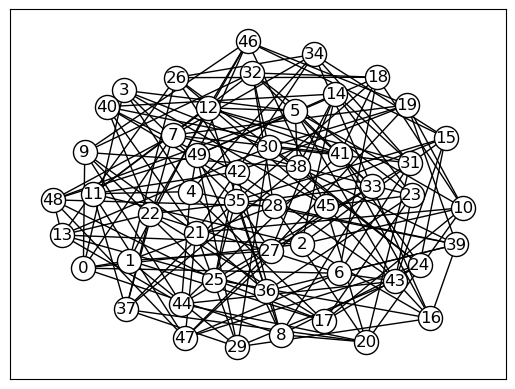

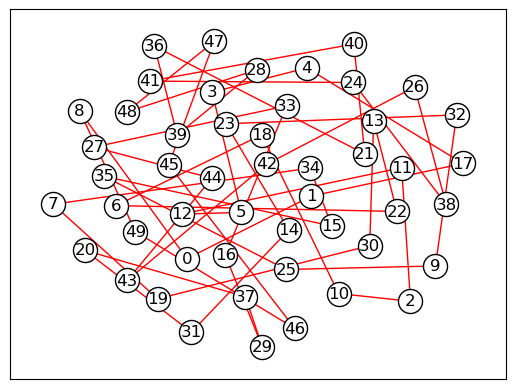

In [6]:
# generate the Hoffman-Singleton graph
G = nx.hoffman_singleton_graph()

# find a Hamiltonian cycle in the graph using the hamiltonian_cycle() function
cycle = hamiltonian_cycle(G)

# print the Hamiltonian cycle
print(f"Hamiltonian cycle for the Hoffman-Singleton graph is {cycle}")

# create set of the edges that belong to the Hamiltonian cycle
edge_cycle = set()
for i in range(len(cycle)-1):
    edge_cycle.add((cycle[i], cycle[i+1]))

# colour the edges that belong to the Hamiltonian cycle red, and the other edges black
edge_colors = []
for u, v in G.edges():
    if (u, v) in edge_cycle or (v, u) in edge_cycle:
        edge_colors.append("r")  # red colour for edges in the cycle
    else:
        edge_colors.append('#FF000000')  # transparent colour for other edges so they dont show on graph
        
# draw whole Hoffman-Singleton Graph with regular black edges
fig, ax = plt.subplots()
nx.draw_networkx(G, node_color="w", edgecolors="k", ax=ax)
plt.show()

# draw the Hamiltonian cycle through the vertices with the edges highlighted in red
fig, ax = plt.subplots()
nx.draw_networkx(G, node_color="w", edgecolors="k", edge_color=edge_colors, ax=ax)
plt.show()